In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

## Load data

In [5]:
df_data_0 = pd.read_csv('test_data/char_7imu_run10_data.csv')
df_data_1 = pd.read_csv('test_data/char_7imu_run11_data.csv')
df_data_2 = pd.read_csv('test_data/char_7imu_run12_data.csv')
df_data_3 = pd.read_csv('test_data/char_7imu_run13_data.csv')
df_data_4 = pd.read_csv('test_data/char_7imu_run14_data.csv')
df_data_5 = pd.read_csv('test_data/char_7imu_run15_data.csv')
df_data_6 = pd.read_csv('test_data/char_7imu_run16_data.csv')
df_data_7 = pd.read_csv('test_data/char_7imu_run17_data.csv')
df_data_8 = pd.read_csv('test_data/char_7imu_run18_data.csv')

## Determine accelerations

In [57]:
true_ax = [-9.81, -9.81/sqrt(2), 0, 9.81/sqrt(2), 9.81]
true_ay = [-9.81, -9.81/sqrt(2), 0, 9.81/sqrt(2), 9.81]
true_az = [9.81, 9.81/sqrt(2), 0]
d_a_true = {'x' : true_ax, 'y' : true_ay, 'z' : true_az}

In [12]:
# accelerations
a_0 = df_data_0.mean()
a_1 = df_data_1.mean()
a_2 = df_data_2.mean()
a_3 = df_data_3.mean()
a_4 = df_data_4.mean()
a_5 = df_data_5.mean()
a_6 = df_data_6.mean()
a_7 = df_data_7.mean()
a_8 = df_data_8.mean()
# error on accelerations
da_0 = df_data_0.std()
da_1 = df_data_1.std()
da_2 = df_data_2.std()
da_3 = df_data_3.std()
da_4 = df_data_4.std()
da_5 = df_data_5.std()
da_6 = df_data_6.std()
da_7 = df_data_7.std()
da_8 = df_data_8.std()

In [38]:
# extract sensor values
d_a_all = {0 : {'x' : [], 'y' : [], 'z' : []}, 
           1 : {'x' : [], 'y' : [], 'z' : []}, 
           2 : {'x' : [], 'y' : [], 'z' : []}, 
           3 : {'x' : [], 'y' : [], 'z' : []}, 
           4 : {'x' : [], 'y' : [], 'z' : []}, 
           5 : {'x' : [], 'y' : [], 'z' : []}, 
           6 : {'x' : [], 'y' : [], 'z' : []}}

for sensor in d_a_all:
    str_x = 'arx%d'%sensor
    str_y = 'ary%d'%sensor
    str_z = 'arz%d'%sensor
    d_a_all[sensor]['x'] = [a_6[str_x], a_3[str_x], 
                           (a_0[str_x]+a_1[str_x]+a_2[str_x]+a_7[str_x]+a_8[str_x])/5, 
                            a_4[str_x], a_5[str_x]]
    d_a_all[sensor]['y'] = [a_7[str_y], a_1[str_y], 
                           (a_0[str_y]+a_3[str_y]+a_4[str_y]+a_5[str_y]+a_6[str_y])/5, 
                            a_2[str_y], a_8[str_y]]
    d_a_all[sensor]['z'] = [a_0[str_z], 
                           (a_1[str_z]+a_2[str_z]+a_3[str_z]+a_4[str_z])/4,
                           (a_5[str_z]+a_6[str_z]+a_7[str_z]+a_8[str_z])/4]
    # some x and y sensor point in opposite directions
    if sensor < 3:
        d_a_all[sensor]['x'].reverse()
        d_a_all[sensor]['y'].reverse()

## Fit coefficients

In [84]:
from sklearn.linear_model import LinearRegression
d_fit_all = {0 : {'x' : [], 'y' : [], 'z' : []}, 
             1 : {'x' : [], 'y' : [], 'z' : []}, 
             2 : {'x' : [], 'y' : [], 'z' : []}, 
             3 : {'x' : [], 'y' : [], 'z' : []}, 
             4 : {'x' : [], 'y' : [], 'z' : []}, 
             5 : {'x' : [], 'y' : [], 'z' : []}, 
             6 : {'x' : [], 'y' : [], 'z' : []}}
for sensor in d_fit_all:
    for dim in d_fit_all[sensor]:
        lr = LinearRegression()
        lr.fit(np.array(d_a_true[dim]).reshape(-1,1), d_a_all[sensor][dim])
        d_fit_all[sensor][dim] = [lr.coef_[0], lr.intercept_, lr.predict(np.array(d_a_true[dim]).reshape(-1,1))]
# repeat y1 measurement due to erronious point
lr = LinearRegression()
lr.fit(np.array(d_a_true['y'][:-1]).reshape(-1,1), d_a_all[1]['y'][:-1])
d_fit_all[1]['y'] = [lr.coef_[0], lr.intercept_, lr.predict(np.array(d_a_true['y']).reshape(-1,1))]

In [77]:
d_fit_all

{0: {'x': [1.0031265273446586,
   0.2779088654350868,
   array([-9.56276237, -6.6804965 ,  0.27790887,  7.23631423, 10.1185801 ])],
  'y': [0.993351923707334,
   -0.1666049792325115,
   array([-9.91138735, -7.05720668, -0.16660498,  6.72399672,  9.57817739])],
  'z': [1.0306605225847503,
   0.33304248606429,
   array([10.44382221,  7.48244339,  0.33304249])]},
 1: {'x': [0.9998153952769345,
   0.4272965503381204,
   array([-9.38089248, -6.50814042,  0.42729655,  7.36273352, 10.23548558])],
  'y': [1.323835329465689,
   1.8096044586403204,
   array([-11.17722012,  -7.37346727,   1.80960446,  10.99267619,
           14.79642904])],
  'z': [1.009568526515123,
   0.8293584754462611,
   array([10.73322572,  7.83245016,  0.82935848])]},
 2: {'x': [1.0025275324870695,
   0.17868957339240518,
   array([-9.65610552, -6.77556073,  0.17868957,  7.13293988, 10.01348467])],
  'y': [0.993727902117587,
   0.0865708609787358,
   array([-9.66189986, -6.80663889,  0.08657086,  6.97978061,  9.83504158])]

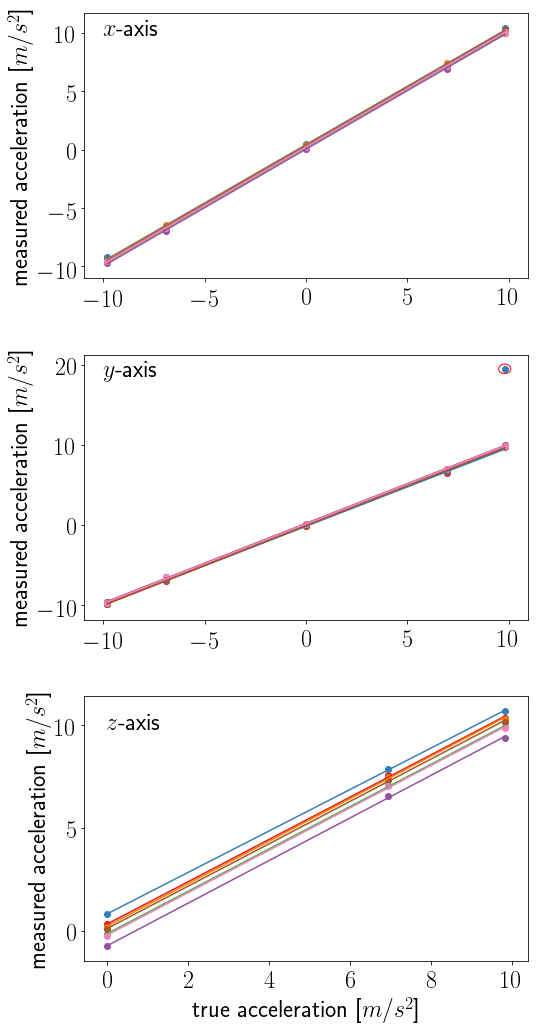

In [99]:
from matplotlib.patches import Ellipse
fig, axs = plt.subplots(3, 1, figsize=(8,15))
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif', size=24)
# plot
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf']
for sensor, c in zip(d_a_all, colors):
    axs[0].scatter(true_ax, d_a_all[sensor]['x'], color=c)
    axs[0].plot(true_ax, d_fit_all[sensor]['x'][2], color=c)
    axs[1].scatter(true_ay, d_a_all[sensor]['y'], color=c)
    axs[1].plot(true_ay, d_fit_all[sensor]['y'][2], color=c)
    axs[2].scatter(true_az, d_a_all[sensor]['z'], color=c)
    axs[2].plot(true_az, d_fit_all[sensor]['z'][2], color=c)
# annotate
circle = Ellipse((9.81, df_data_7['ary1'].mean()), 0.6, 1.2, facecolor='none', edgecolor='r')
axs[1].add_patch(circle)
# display and save
axs[0].set_ylabel(r"measured acceleration [$m/s^2$]")
axs[0].annotate(r"$x$-axis", (-10,9.81))
axs[1].set_ylabel(r"measured acceleration [$m/s^2$]")
axs[1].annotate(r"$y$-axis", (-10,18.51))
axs[2].set_ylabel(r"measured acceleration [$m/s^2$]")
axs[2].set_xlabel(r"true acceleration [$m/s^2$]")
axs[2].annotate(r"$z$-axis", (0,9.81))
fig.tight_layout()
fig.savefig("char_plots.png")
plt.show()

In [88]:
# determine fit statistics
d_m = {'x' : [], 'y' : [], 'z' : []}
d_c = {'x' : [], 'y' : [], 'z' : []}
for sensor in d_fit_all:
    for dim in d_fit_all[sensor]:
        d_m[dim].append(d_fit_all[sensor][dim][0])
        d_c[dim].append(d_fit_all[sensor][dim][1])
for dim in d_m:
    a_m = np.array(d_m[dim])
    a_c = np.array(d_c[dim])
    d_m[dim] = [a_m.mean(), a_m.std()]
    d_c[dim] = [a_c.mean(), a_c.std()]

In [89]:
d_m

{'x': [1.0019791563420954, 0.0012949182057963471],
 'y': [0.9922508934205707, 0.004059232791154098],
 'z': [1.0300517754538445, 0.008670404161988778]}

In [90]:
d_c

{'x': [0.2661462492609471, 0.12125415233194393],
 'y': [-0.01523694361777045, 0.1307770810258716],
 'z': [0.06306058568177443, 0.4505247253748541]}